# Netflix Data Study

This project was done with the purpose of developing my Pandas skills, and also to have fun with some Netflix data!

### Importing dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading data

In [2]:
df = pd.read_csv('data/netflix_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


### Reshaping and cleaning data

In [5]:
# Removing columns show_id and description
netflix_df = df.drop(["show_id", "description"], axis=1)

# Removing any row with a null value
netflix_df = netflix_df.dropna(how='any', axis=0)

# Renaming columns
netflix_df = netflix_df.rename(
    columns={
        "type": "Type",
        "title": "Title",
        "director": "Director",
        "cast": "Cast",
        "country": "Country of Origin",
        "date_added": "Date added",
        "release_year": "Release Year",
        "rating": "Rating",
        "duration": "Duration",
        "listed_in": "Genres"
        
    }
)

In [6]:
netflix_df.head()

,Type,Title,Director,Cast,Country of Origin,Date added,Release Year,Rating,Duration,Genres
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies"
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies"
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas
5,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries"


In [7]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4808 entries, 1 to 7783
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Type               4808 non-null   object
 1   Title              4808 non-null   object
 2   Director           4808 non-null   object
 3   Cast               4808 non-null   object
 4   Country of Origin  4808 non-null   object
 5   Date added         4808 non-null   object
 6   Release Year       4808 non-null   int64 
 7   Rating             4808 non-null   object
 8   Duration           4808 non-null   object
 9   Genres             4808 non-null   object
dtypes: int64(1), object(9)
memory usage: 413.2+ KB


### What countries have the most TV Shows?

In [8]:
tv_shows = netflix_df[netflix_df["Type"] == "TV Show"]
tv_shows[["Title", "Country of Origin"]].groupby("Country of Origin").count().sort_values(by="Title", ascending=False).head(20)

,Title
Country of Origin,
United States,26
United Kingdom,19
South Korea,10
Japan,10
Spain,7
Taiwan,6
Turkey,5
India,5
Brazil,4


#### Since we had an issue with multiple countries in the "Country of Origin" column, we're gonna have to separate these countries properly.

In [9]:
# Looping through all titles in TV Shows df, and separating those with commas.
def separate_by_comma(df_column1, df_column2):
    items = np.array([])
    for i in range(df_column1.size):
        item = df_column2.iloc[i]
        if "," in item:
            item = np.array(item.split(','))
        items = np.append(items, item)
    return items

countries = separate_by_comma(tv_shows["Title"], tv_shows["Country of Origin"])
    
# Looping thourgh multiple countries, and adding to the dict.
def count_dict(arr):
    _dict = {}
    for item in arr:
        item = item.strip()
        if item not in _dict:
            _dict[item] = 1
        else:
            _dict[item] += 1
    return _dict
            
countries_tv_shows = count_dict(countries)
countries_tv_shows = pd.DataFrame(
    {
        "Country": list(countries_tv_shows.keys()),
        "Count": list(countries_tv_shows.values())
    }
)

countries_tv_shows.sort_values(by="Count", ascending=False).head()

,Country,Count
4,United States,38
15,United Kingdom,23
3,Japan,11
6,South Korea,11
10,Spain,9


#### Let's create some graphs to see this data more clearly.

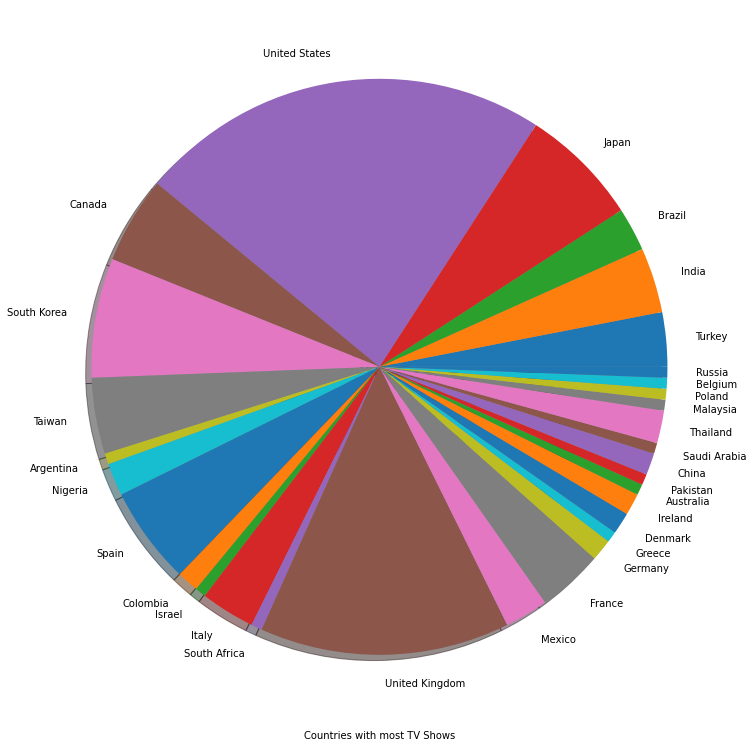

In [10]:
# Pie chart
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1])
ax.pie(countries_tv_shows["Count"], labels=countries_tv_shows["Country"], shadow=True)
ax.set_xlabel("Countries with most TV Shows")
plt.show(fig)

fig.savefig("graphs/countries_tv_shows_pie.jpg", bbox_inches='tight')

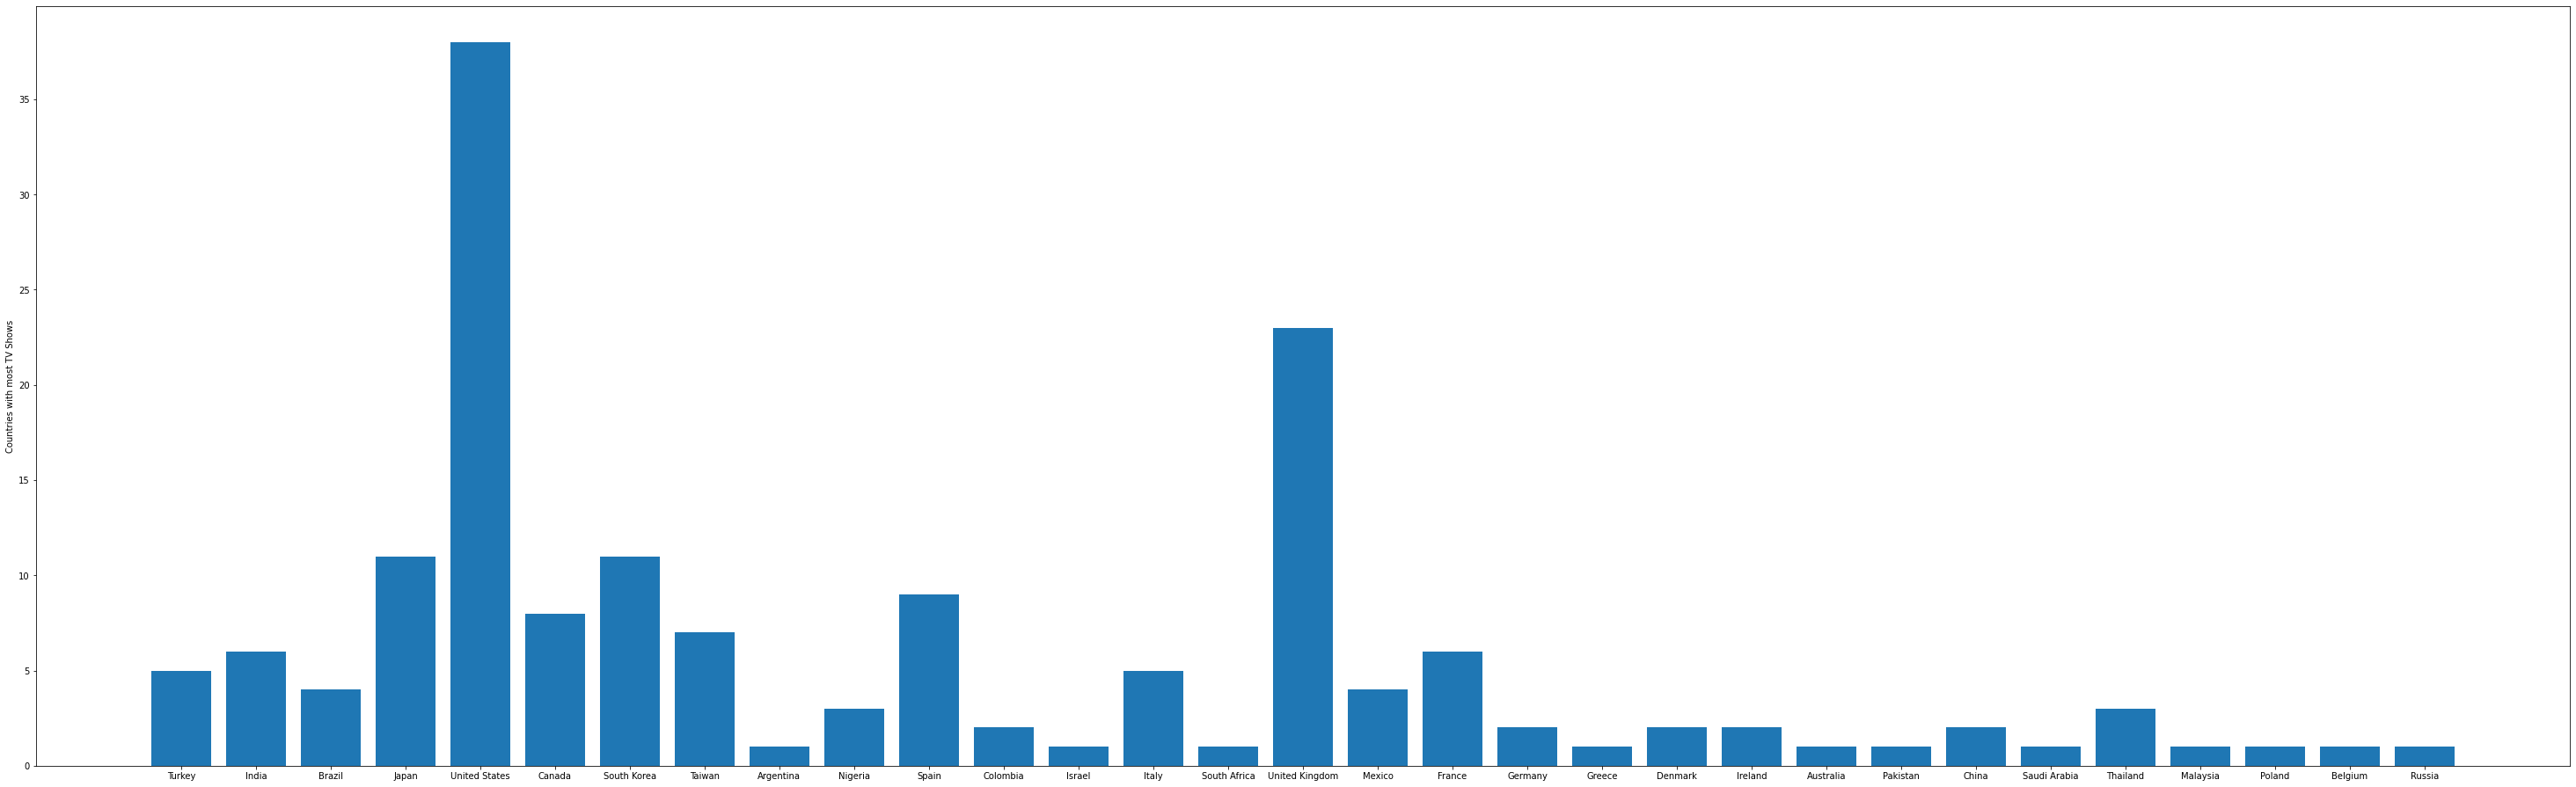

In [11]:
# Bar chart
fig = plt.figure(figsize=(40,12))
ax = fig.add_axes([0,0,1,1])
ax.bar(countries_tv_shows["Country"], countries_tv_shows["Count"])
ax.set_ylabel("Countries with most TV Shows")
plt.show(fig)

fig.savefig("graphs/countries_tv_shows_bar.jpg", bbox_inches='tight')

#### With that we can conclude that the countries with most TV Shows in Netflix are:
* United States - 38
* United Kingdom - 23
* Japan - 11
* South Korea - 11
* Spain - 9

### What countries have the most Movies?

In [12]:
movies = netflix_df[netflix_df["Type"] == "Movie"]
movies[["Title", "Country of Origin"]].groupby("Country of Origin").count().sort_values(by="Title", ascending=False).head(20)

,Title
Country of Origin,
United States,1627
India,827
United Kingdom,155
Canada,101
Egypt,87
Spain,76
Turkey,71
Philippines,70
Indonesia,67


In [37]:
# Since we've created all the necessary functions on the previous topic, let's just reuse it.
countries = separate_by_comma(movies["Title"], movies["Country of Origin"])
countries_movies = count_dict(countries)

countries_movies = pd.DataFrame(
    {
        "Country": list(countries_movies.keys()),
        "Count": list(countries_movies.values())
    }
)

# 20 countries with most movies 
countries_movies.sort_values(by="Count", ascending=False).head(20)

,Country,Count
2,United States,2143
4,India,885
22,United Kingdom,403
12,Canada,255
17,France,248
21,Germany,141
14,Spain,138
27,Japan,97
20,China,96
3,Egypt,95


In [44]:
# Since we have too many countries, we'll need to split it for our charts
top30_countries_movies = countries_movies.sort_values(by="Count", ascending=False).head(30)
top30_countries_movies = top30_countries_movies.sort_values(by="Country", ascending=False)

countries_movies.count() | top30_countries_movies.count()

Country    126
Count      126
dtype: int64

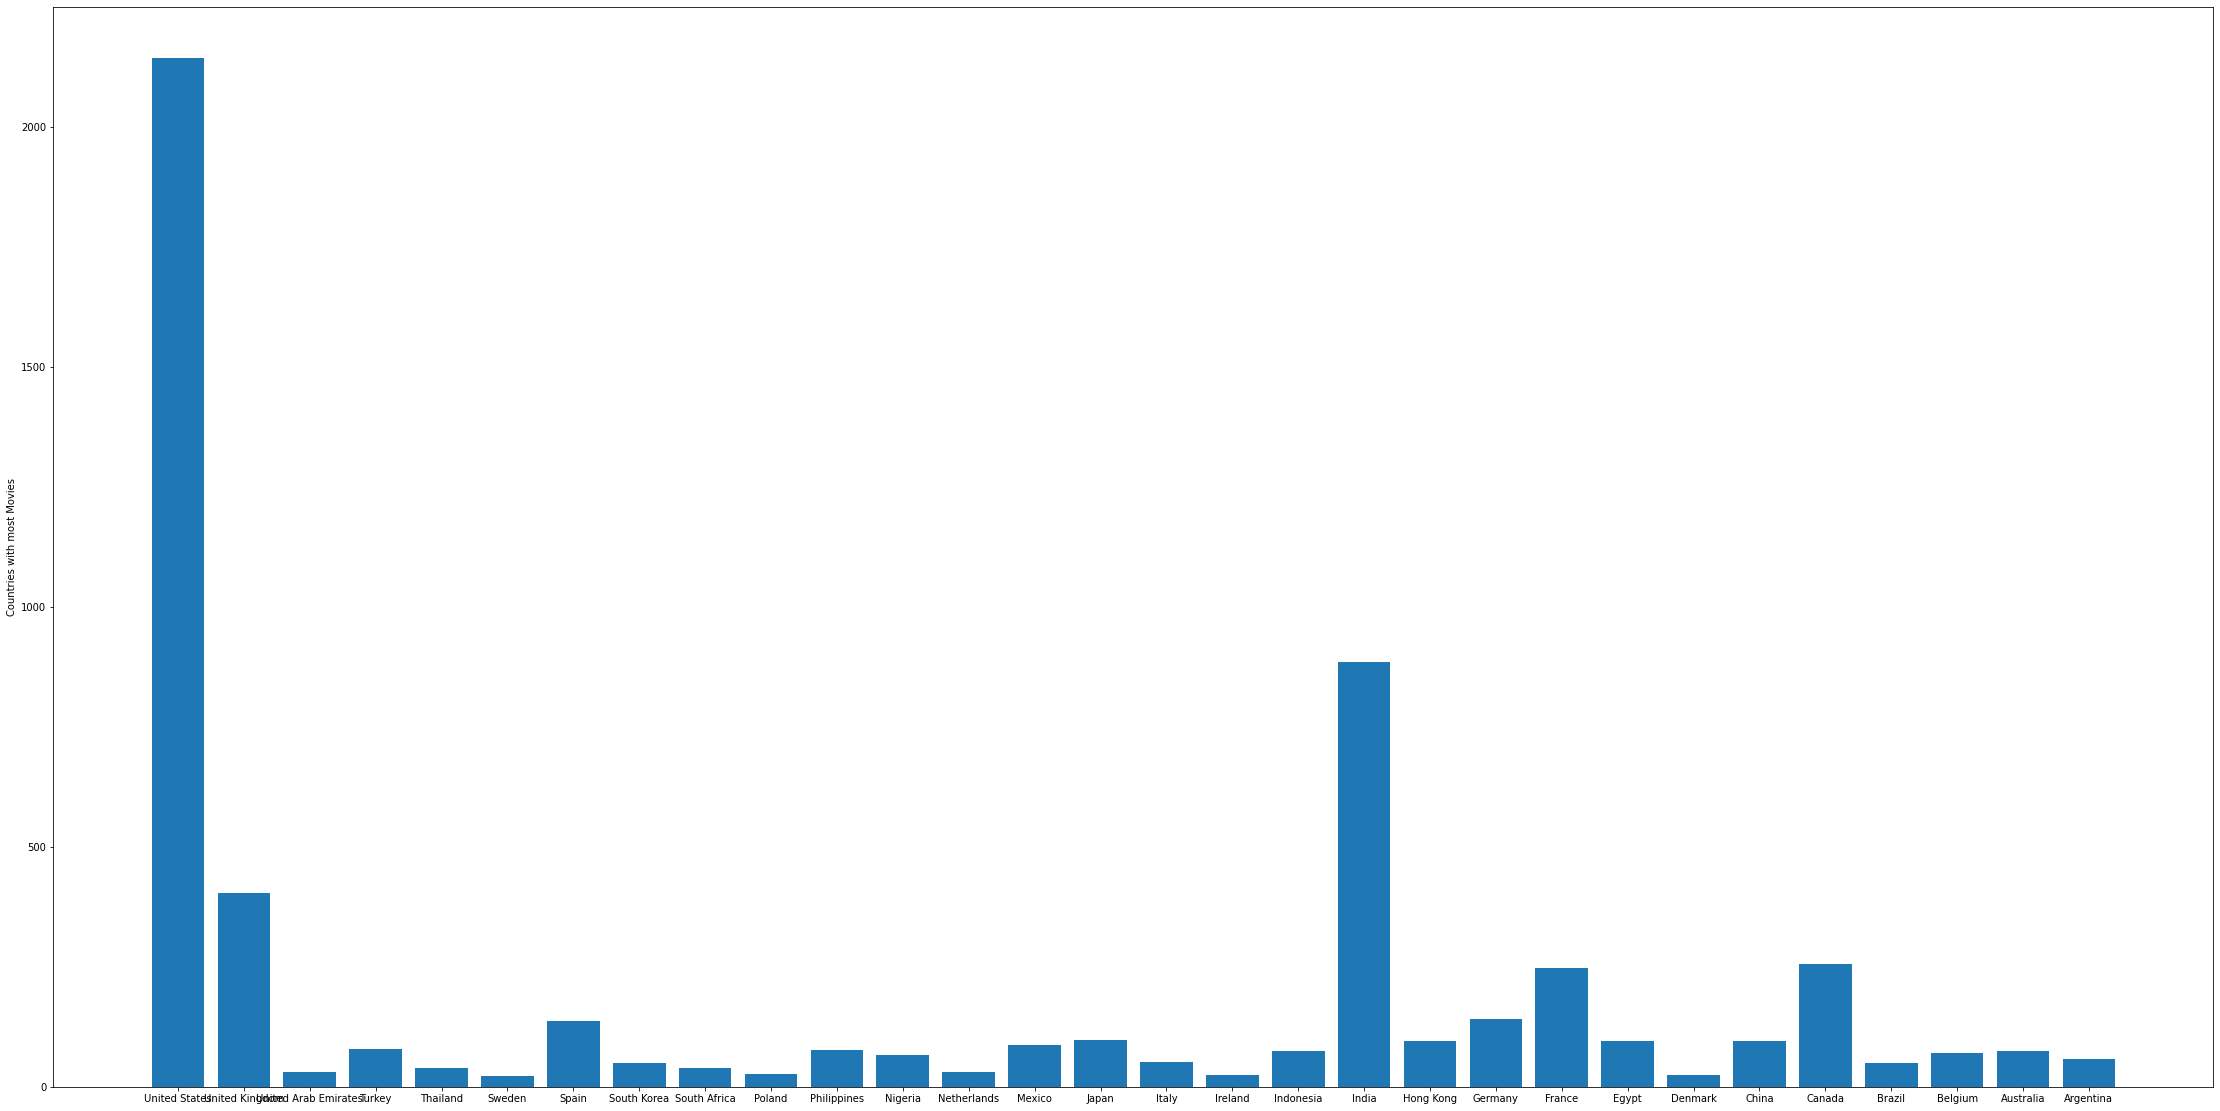

In [15]:
# Bar chart
fig = plt.figure(figsize=(30,15))
ax = fig.add_axes([0,0,1,1])
ax.bar(top30_countries_movies["Country"], top30_countries_movies["Count"])
ax.set_ylabel("Countries with most Movies")
plt.show(fig)

fig.savefig("graphs/countries_movies_bar.jpg", bbox_inches='tight')

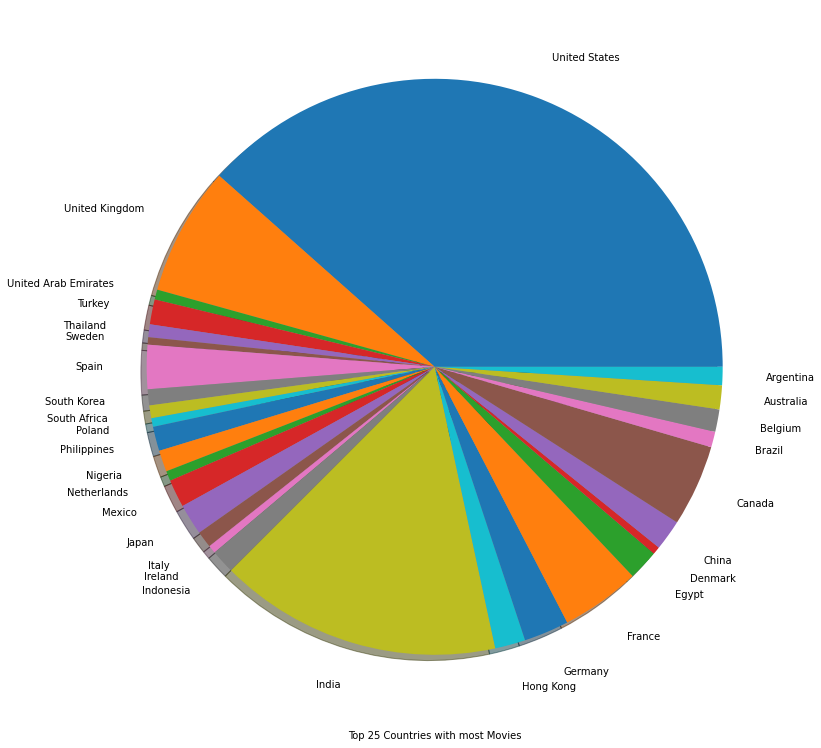

In [35]:
# Pie chart
fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])
ax.pie(top30_countries_movies["Count"], labels=top30_countries_movies["Country"], shadow=True, labeldistance=1.15)
ax.set_xlabel("Top 25 Countries with most Movies")
plt.show(fig)

fig.savefig("graphs/top25_countries_movies_pie.jpg", bbox_inches='tight')